In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = pd.read_csv(r'C:\Users\asli_\PYTHON_PROJECTS\TEZ_PROJE\small-mall-dataset.csv')


In [7]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [10]:
# Ürünlerin satış sayısını gruplayarak hesapla
top_products = data.groupby('Product line')['Quantity'].sum().sort_values(ascending=False).head(10)

print(top_products)

Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64


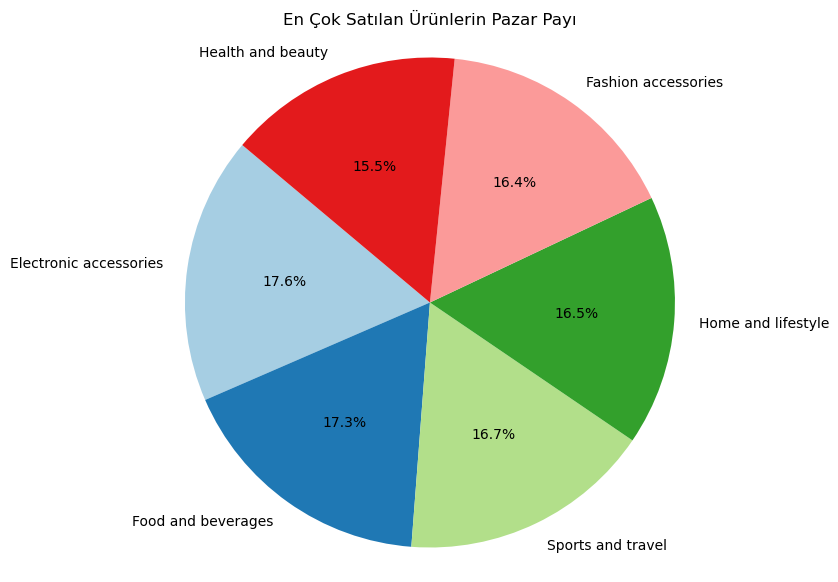

In [8]:
#Hangi ürünler en çok satılıyor?


# Ürünlerin satışlarını topla
satışlar = data.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)

# Grafik için renkler
colors = plt.cm.Paired(range(len(satışlar)))

# Daire grafiği oluştur
plt.figure(figsize=(10, 7))
plt.pie(satışlar, labels=satışlar.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('En Çok Satılan Ürünlerin Pazar Payı')
plt.axis('equal')  # Daireyi dairenin içine sığdır
plt.show()

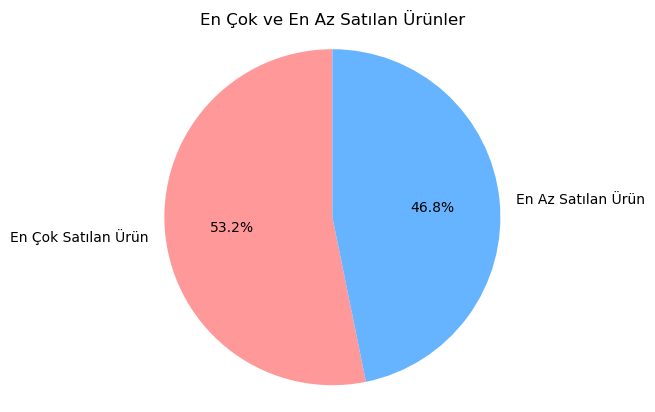

In [11]:
# Ürünlerin toplam satış adetlerini hesapla
product_sales = data.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)

# En çok ve en az satılan ürünleri al
most_sold = product_sales.head(1)
least_sold = product_sales.tail(1)

# Grafik için verileri hazırla
labels = ['En Çok Satılan Ürün', 'En Az Satılan Ürün']
sizes = [most_sold.values[0], least_sold.values[0]]
colors = ['#ff9999','#66b3ff']

# Daire grafiği oluştur
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Daire grafiği çember olarak görüntülenir
plt.title('En Çok ve En Az Satılan Ürünler')
plt.show()

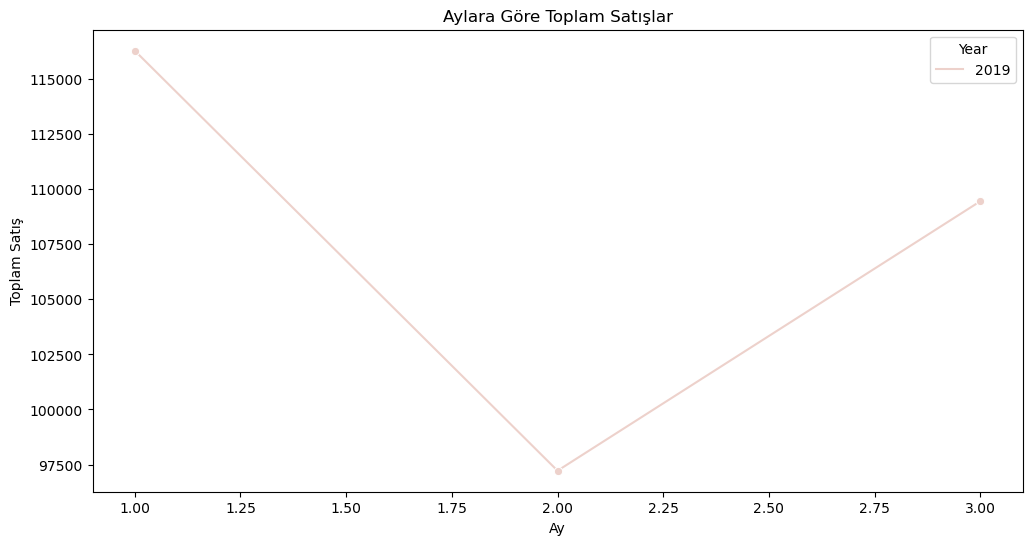

In [20]:
#Satışların mevsimsel değişimleri var mı?

# "Date" sütununu datetime formatına çevir
data['Date'] = pd.to_datetime(data['Date'])

# "Date" sütunundan ayları ve yılları al
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Aylık toplam satışları hesapla
monthly_sales = data.groupby(['Year', 'Month'])['Total'].sum().reset_index()

# Grafik için boyut ayarla
plt.figure(figsize=(12, 6))

# Seaborn kütüphanesiyle çizgi grafiği oluştur
sns.lineplot(x='Month', y='Total', hue='Year', data=monthly_sales, marker='o')

# Grafik başlığı ve eksen etiketleri ekle
plt.title('Aylara Göre Toplam Satışlar')
plt.xlabel('Ay')
plt.ylabel('Toplam Satış')

# Grafik göster
plt.show()

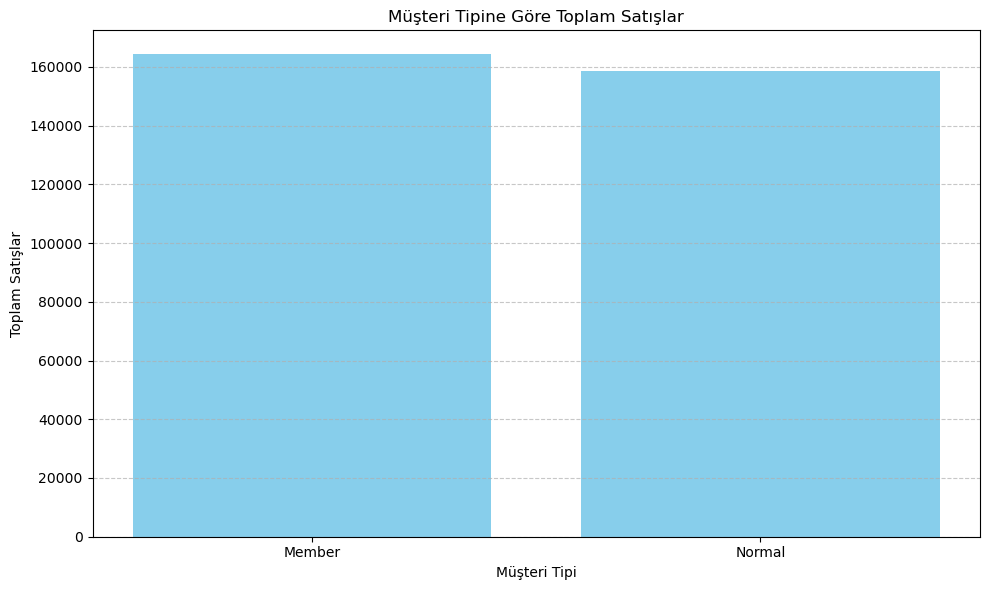

In [21]:
#Müşteri tipine göre satışlar nasıl değişiyor?

# Müşteri tipine göre grupla ve toplam satışları hesapla
sales_by_customer_type = data.groupby('Customer type')['Total'].sum().reset_index()

# Çubuk grafik oluştur
plt.figure(figsize=(10, 6))
plt.bar(sales_by_customer_type['Customer type'], sales_by_customer_type['Total'], color='skyblue')
plt.xlabel('Müşteri Tipi')
plt.ylabel('Toplam Satışlar')
plt.title('Müşteri Tipine Göre Toplam Satışlar')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Grafiği göster veya kaydet
plt.show()

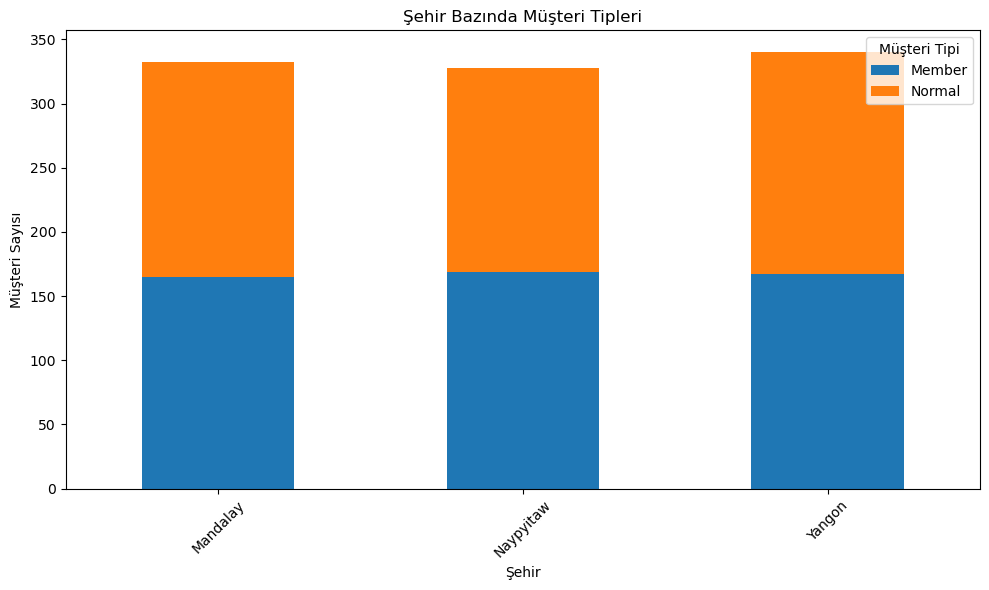

In [22]:
#Şehir bazında farklı müşteri grupları var mı?

# Şehir bazında farklı müşteri gruplarını say
city_customer_types = data.groupby(['City', 'Customer type']).size().unstack(fill_value=0)

# Grafik oluştur
city_customer_types.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Şehir Bazında Müşteri Tipleri')
plt.xlabel('Şehir')
plt.ylabel('Müşteri Sayısı')
plt.xticks(rotation=45)
plt.legend(title='Müşteri Tipi')
plt.tight_layout()
plt.show()

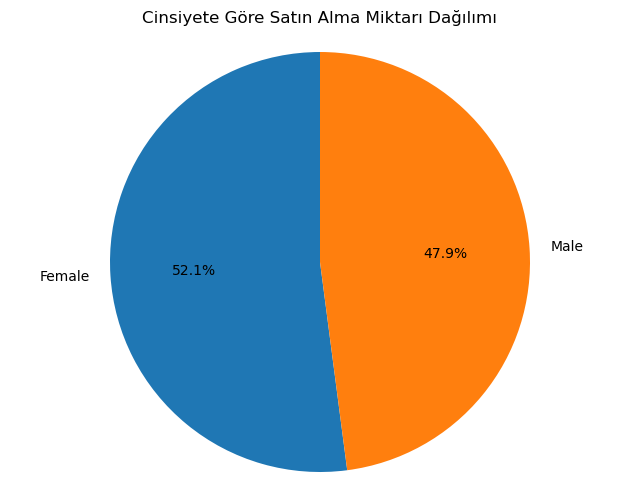

In [26]:
#Cinsiyete göre satın alma alışkanlıkları nasıl farklılık gösteriyor?

# Cinsiyete göre toplam satın alma miktarlarını hesapla
gender_purchases = data.groupby('Gender')['Quantity'].sum()

# Daire grafiği oluştur
plt.figure(figsize=(8, 6))
plt.pie(gender_purchases, labels=gender_purchases.index, autopct='%1.1f%%', startangle=90)
plt.title('Cinsiyete Göre Satın Alma Miktarı Dağılımı')
plt.axis('equal')  # Daire grafiğinin daire şeklinde olmasını sağlar
plt.show()

    Tax 5%     Total  Vergi Etkisi
0  26.1415  548.9715      0.047619
1   3.8200   80.2200      0.047619
2  16.2155  340.5255      0.047619
3  23.2880  489.0480      0.047619
4  30.2085  634.3785      0.047619


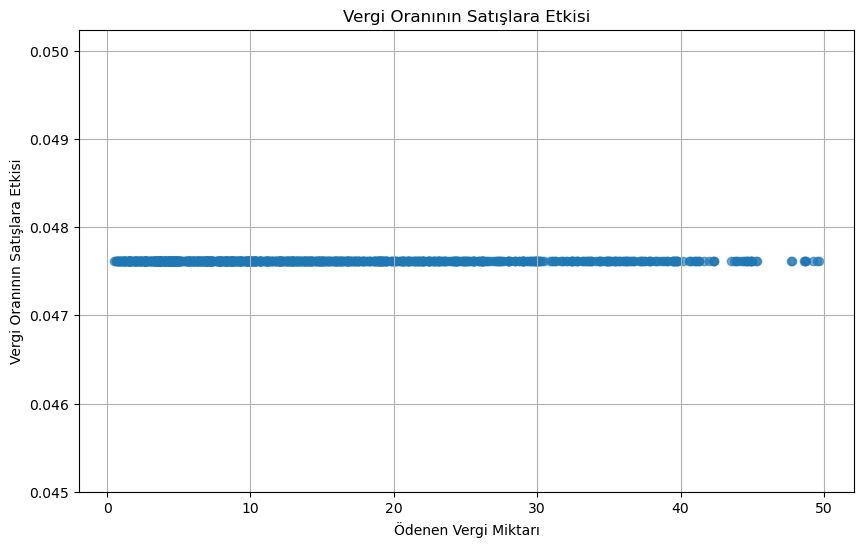

In [36]:
#Vergi oranının satışlara etkisi nasıl?

# Vergi Oranının Satışlara Etkisini Hesapla
data['Vergi Etkisi'] = data['Tax 5%'] / data['Total']

# Sonuçları Kontrol Et
print(data[['Tax 5%', 'Total', 'Vergi Etkisi']].head())

# Grafik Oluşturma
plt.figure(figsize=(10, 6))
plt.scatter(data['Tax 5%'], data['Vergi Etkisi'], alpha=0.6)
plt.title('Vergi Oranının Satışlara Etkisi')
plt.xlabel('Ödenen Vergi Miktarı')
plt.ylabel('Vergi Oranının Satışlara Etkisi')
plt.grid(True)
plt.show()



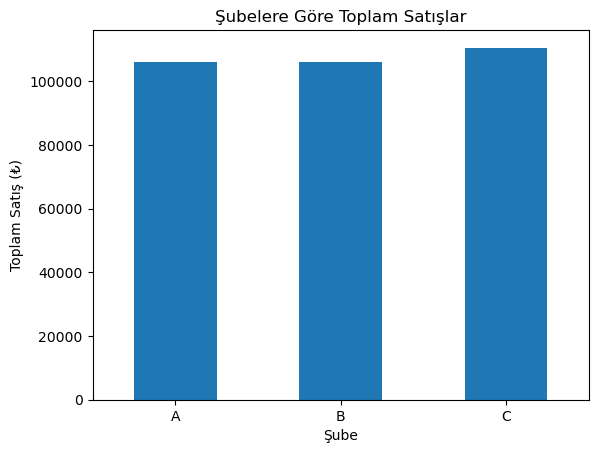

In [39]:
# Şubelere göre toplam satışları hesapla
branch_sales = data.groupby('Branch')['Total'].sum()

# Çubuk grafik oluştur
branch_sales.plot(kind='bar', rot=0)
plt.xlabel('Şube')
plt.ylabel('Toplam Satış (₺)')
plt.title('Şubelere Göre Toplam Satışlar')
plt.show()


   Branch            Product line  Quantity
0       A  Electronic accessories       322
1       A     Fashion accessories       263
2       A      Food and beverages       313
3       A       Health and beauty       257
4       A      Home and lifestyle       371
5       A       Sports and travel       333
6       B  Electronic accessories       316
7       B     Fashion accessories       297
8       B      Food and beverages       270
9       B       Health and beauty       320
10      B      Home and lifestyle       295
11      B       Sports and travel       322
12      C  Electronic accessories       333
13      C     Fashion accessories       342
14      C      Food and beverages       369
15      C       Health and beauty       277
16      C      Home and lifestyle       245
17      C       Sports and travel       265


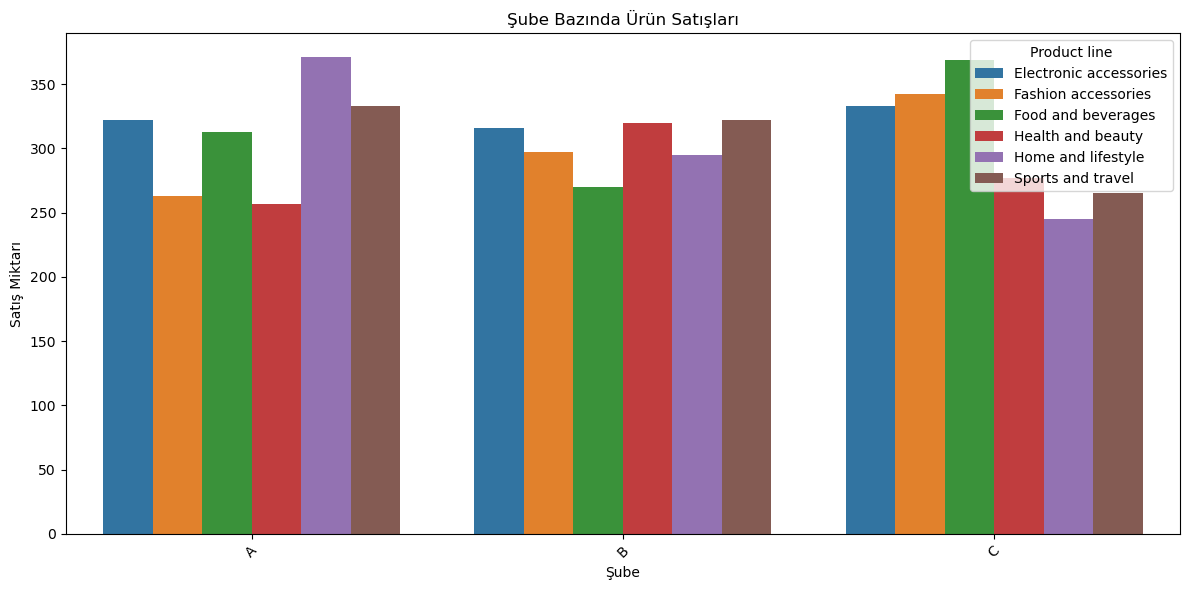

In [40]:
#Hangi şube hangi ürünlerde daha başarılı?

# Şube ve Ürün satışlarını grupla
branch_product_sales = data.groupby(['Branch', 'Product line'])['Quantity'].sum().reset_index()

# Şube bazında ürün satışlarını gösteren tablo
print(branch_product_sales)

# Çubuk grafiği oluştur
plt.figure(figsize=(12, 6))
sns.barplot(x='Branch', y='Quantity', hue='Product line', data=branch_product_sales)
plt.title('Şube Bazında Ürün Satışları')
plt.ylabel('Satış Miktarı')
plt.xlabel('Şube')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


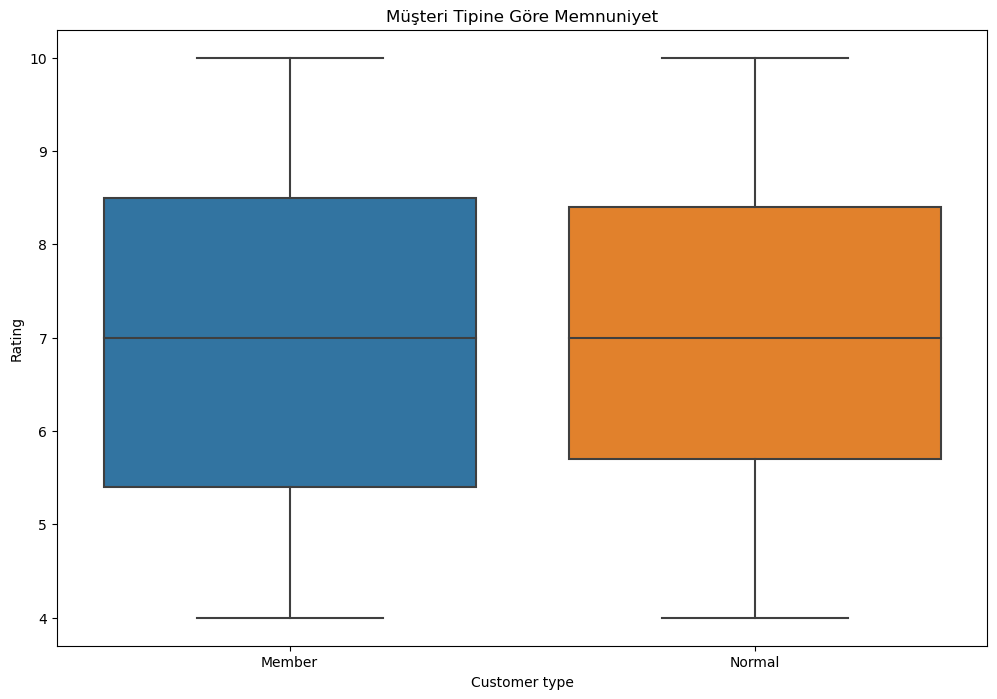

In [43]:
#Müşteri Memnuniyeti (Rating) üzerine analizler

# Müşteri memnuniyeti (Rating) ile diğer özellikler arasındaki ilişkiyi incele
plt.figure(figsize=(12, 8))
sns.boxplot(x='Customer type', y='Rating', data=data)
plt.title('Müşteri Tipine Göre Memnuniyet')
plt.xlabel('Customer type')
plt.ylabel('Rating')
plt.show()

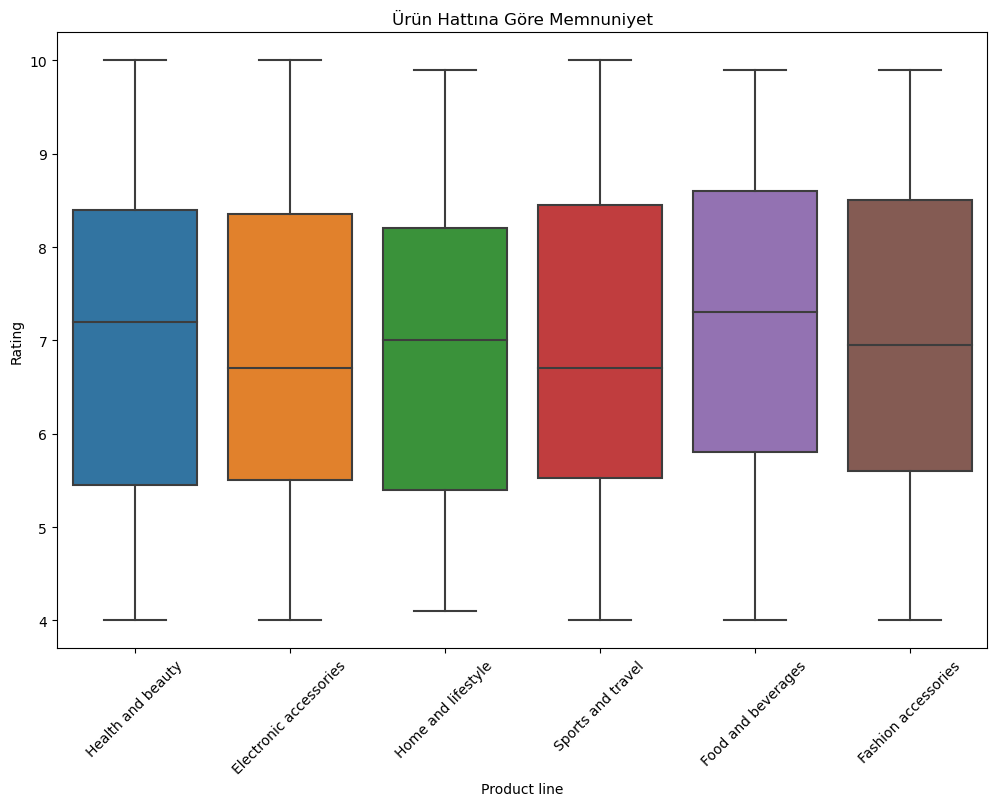

In [44]:
##Müşteri Memnuniyeti (Rating) üzerine analizler


plt.figure(figsize=(12, 8))
sns.boxplot(x='Product line', y='Rating', data=data)
plt.title('Ürün Hattına Göre Memnuniyet')
plt.xlabel('Product line')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

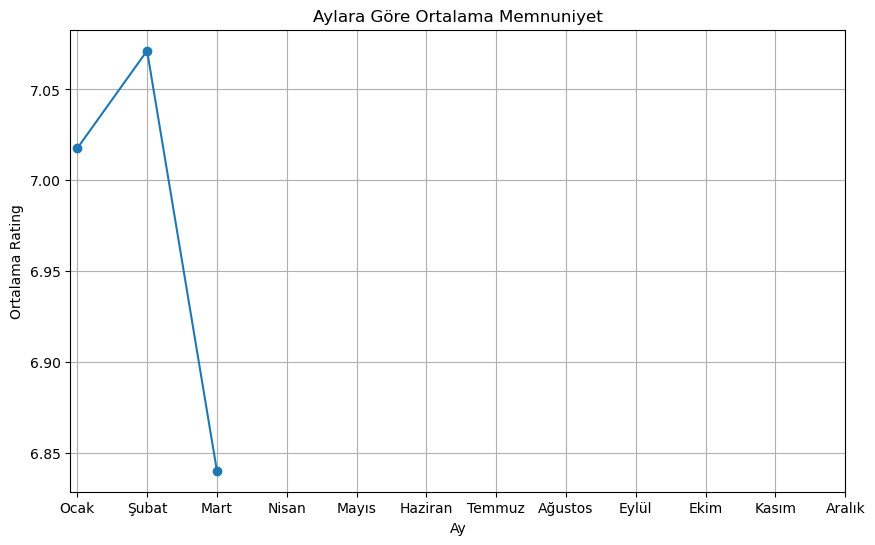

In [45]:
###Müşteri Memnuniyeti (Rating) üzerine analizler


# Tarih boyunca müşteri memnuniyeti değişimini incele
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
monthly_avg_rating = data.groupby('Month')['Rating'].mean()

plt.figure(figsize=(10, 6))
monthly_avg_rating.plot(kind='line', marker='o')
plt.title('Aylara Göre Ortalama Memnuniyet')
plt.xlabel('Ay')
plt.ylabel('Ortalama Rating')
plt.xticks(range(1, 13), ['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran', 'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık'])
plt.grid(True)
plt.show()

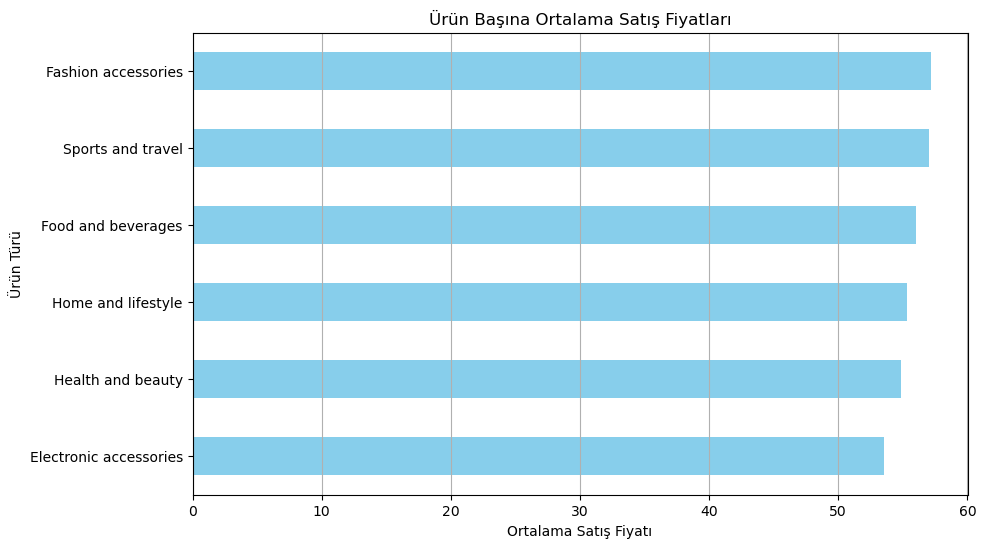

In [48]:
#Ürün başına ortalama satış fiyatları (Unit Price)

# Ürün başına ortalama satış fiyatlarını hesapla
average_unit_price = data.groupby('Product line')['Unit price'].mean().sort_values()

# Grafik oluştur
plt.figure(figsize=(10,6))
average_unit_price.plot(kind='barh', color='skyblue')
plt.xlabel('Ortalama Satış Fiyatı')
plt.ylabel('Ürün Türü')
plt.title('Ürün Başına Ortalama Satış Fiyatları')
plt.grid(axis='x')
plt.show()

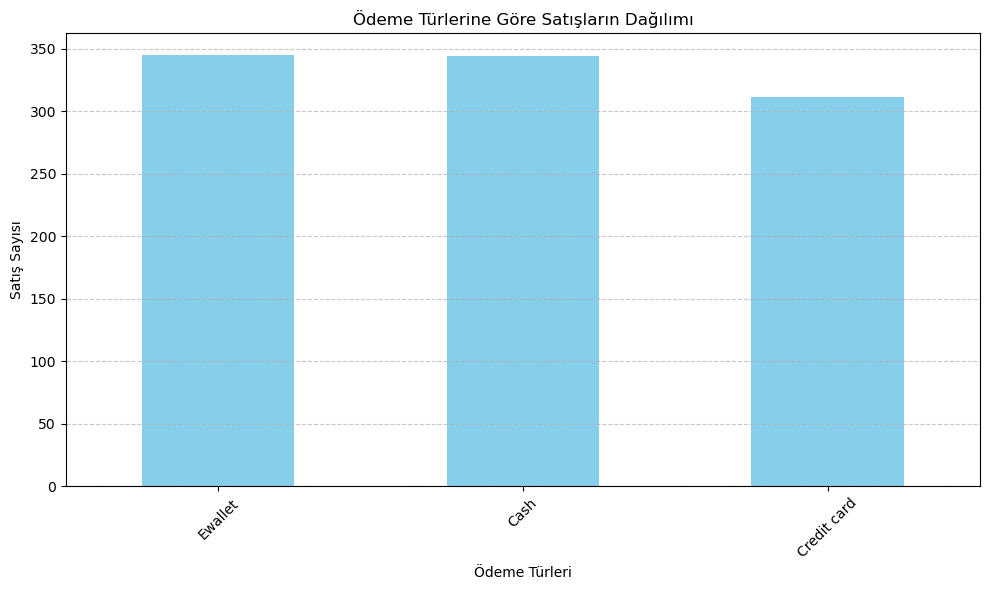

In [52]:

# Ödeme türlerine göre satışların dağılımını hesapla
payment_distribution = data['Payment'].value_counts()

# Grafik oluştur
plt.figure(figsize=(10, 6))
payment_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Ödeme Türleri')
plt.ylabel('Satış Sayısı')
plt.title('Ödeme Türlerine Göre Satışların Dağılımı')
plt.xticks(rotation=45)  # x eksenindeki yazıların yatay olarak görünmesi için
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

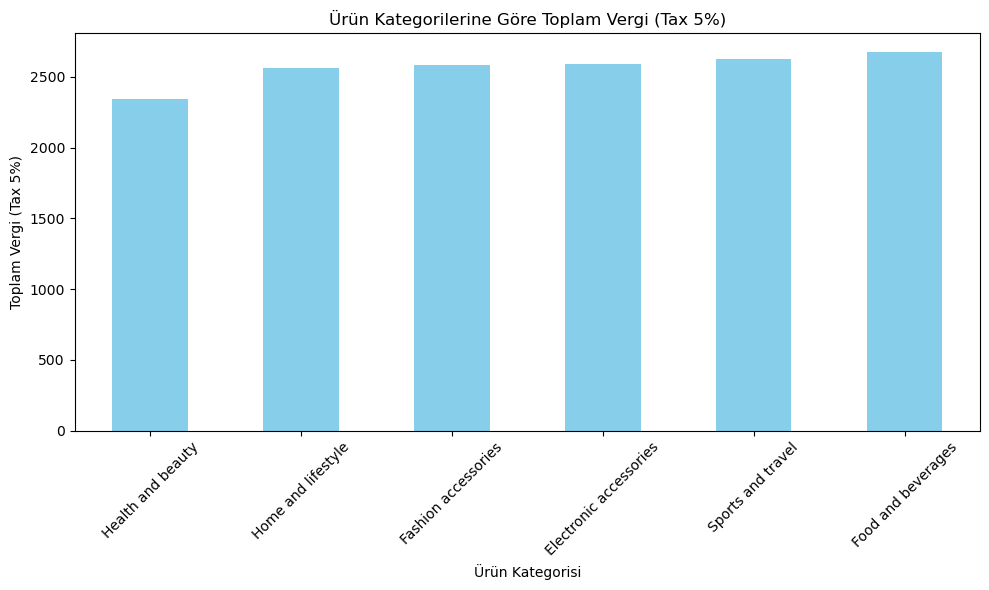

In [53]:
# Vergi (Tax 5%) analizi
tax_analysis = data.groupby('Product line')['Tax 5%'].sum().sort_values()

# Grafik oluşturma
plt.figure(figsize=(10, 6))
tax_analysis.plot(kind='bar', color='skyblue')
plt.xlabel('Ürün Kategorisi')
plt.ylabel('Toplam Vergi (Tax 5%)')
plt.title('Ürün Kategorilerine Göre Toplam Vergi (Tax 5%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


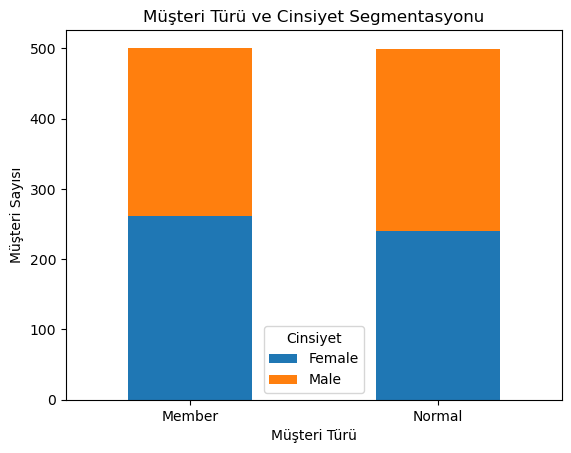

In [54]:
# Müşteri Türü ve Cinsiyet bazında toplam müşteri sayılarını al
segment_counts = data.groupby(['Customer type', 'Gender']).size().unstack()

# Bar grafiği oluştur
segment_counts.plot(kind='bar', stacked=True)
plt.title('Müşteri Türü ve Cinsiyet Segmentasyonu')
plt.xlabel('Müşteri Türü')
plt.ylabel('Müşteri Sayısı')
plt.xticks(rotation=0)
plt.legend(title='Cinsiyet')
plt.show()